In [ ]:
!pip install janome

     |████████████████████████████████| 19.7 MB 87.1 MB/s 


In [ ]:
! curl http://www.cl.ecei.tohoku.ac.jp/resources/sent_lex/pn.csv.m3.120408.trim > pn.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  676k  100  676k    0     0   316k      0  0:00:02  0:00:02 --:--:--  316k


In [ ]:
!curl https://www.aozora.gr.jp/cards/000879/files/127_15260.html > syosetu.html

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21864  100 21864    0     0   7747      0  0:00:02  0:00:02 --:--:--  7744


In [ ]:
!curl news.txt > news1.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: news.txt


In [ ]:
from bs4 import BeautifulSoup 
# ファイルを読み込む 
with open("syosetu.html", "rt", encoding="sjis") as f: 
  html = f.read() 
# HTMLをパースする 
  soup = BeautifulSoup(html, 'html.parser') 
# ルビを削除 
  soup.find("rp").extract() 
  soup.find("rt").extract() 
# テキストだけを取り出す 
  text = soup.get_text() 
  print(text) 
# 保存 
  with open("syosetu.txt", "wt", encoding="utf-8") as w: 
    w.write(text)

In [ ]:
# ネガポジ辞書
import csv 
np_dic = {} 
fp = open("pn.csv", "rt", encoding="utf-8") 
reader = csv.reader(fp, delimiter='\t') 
for i, row in enumerate(reader): 
  name = row[0] 
  result = row[1] 
  np_dic[name] = result 
  if i % 500 == 0: 
    print(i) 
    print("ok")

#Exam
print(np_dic["笑顔"]) 
print(np_dic["嫌い"]) 
print(np_dic["時間"])

In [ ]:
# テキストの読み込み
text = [None] * 10
for i in range(10):
    fp = open('news{}.txt'.format(i + 1), mode='rt', encoding='utf-8')
    text[i] = fp.read()

# 小説を読み込む 
#fp = open("syosetu.txt", "rt", encoding="utf-8") 
#text = fp.read() 

# 形態素解析 
from janome.tokenizer import Tokenizer 
tok = Tokenizer() 

# 数える
pos = [None] * 10
neg = [None] * 10
res_new = [None] * 10
for i in range(10):
  res = {"p":0, "n":0, "e":0} 
  for t in tok.tokenize(text[i]): 
    bf = t.base_form # 基本形 
    # 辞書にあるか確認 
    if bf in np_dic: 
      r = np_dic[bf] 
      if r in res: 
        res[r] += 1 
        print(bf,np_dic[bf])
  res_new[i] = res
  # 結果を表示
  print(res_new[i])
  cnt = res["p"] + res["n"] + res["e"] 
  pos[i] = (res["p"] / cnt)*100
  neg[i] = (res["n"] / cnt)*100
  print("ポジティブ度", pos[i], "%") 
  print("ネガティブ度", neg[i], "%")

# 累計ネガポジの分析用ファイル作成
f = open('negpos_res.txt','w')
for i in range(10):
  f.write('news')
  f.write(str(i+1))
  f.write('\n')
  f.write('Positive: ')
  f.write(str(pos[i]))
  f.write('\n')
  f.write('Negative: ')
  f.write(str(neg[i]))
  f.write('\n')
  f.write('\n')
f.close()


増 e
出席 e
議員 e
国益 p
異論 n
格差 n
是正 e
ため p
議論 e
検討 e
増 e
確定 e
増 e
増 e
審議 e
{'p': 2, 'n': 2, 'e': 11}
ポジティブ度 13.333333333333334 %
ネガティブ度 13.333333333333334 %
世界 e
高速 p
夢 e
高速 p
主 e
高速 p
研究 e
無理 n
先生 e
研究 e
自分 e
計算 e
{'p': 3, 'n': 1, 'e': 8}
ポジティブ度 25.0 %
ネガティブ度 8.333333333333332 %
活躍 p
女性 e
歌手 p
恋 e
雨 e
名曲 p
本名 e
ガン n
{'p': 3, 'n': 1, 'e': 4}
ポジティブ度 37.5 %
ネガティブ度 12.5 %
ウイルス n
警戒 n
感染 n
状況 e
医療 e
提供 p
{'p': 1, 'n': 3, 'e': 2}
ポジティブ度 16.666666666666664 %
ネガティブ度 50.0 %
タレント e
優 p
更新 e
交際 e
結婚 p
付き合い p
友人 p
お許し e
尊重 p
自由 p
気持ち p
時間 e
自信 p
{'p': 8, 'n': 0, 'e': 5}
ポジティブ度 61.53846153846154 %
ネガティブ度 0.0 %
米 e
移植 e
成功 p
執刀 e
医師 e
移植 e
不足 n
危機 n
打開 e
強調 e
移植 e
患者 n
移植 e
二者択一 e
望み p
時間 e
監視 e
状態 e
{'p': 2, 'n': 3, 'e': 13}
ポジティブ度 11.11111111111111 %
ネガティブ度 16.666666666666664 %
目 e
決勝 e
対 e
目 e
優勝 p
目 e
決勝 e
決勝 e
決勝 e
先制 e
追加 e
点 e
点 e
攻撃 e
手 e
手 e
対 e
勝ち p
目 e
優勝 p
決勝 e
中心 e
得点 p
優勝 p
{'p': 5, 'n': 0, 'e': 19}
ポジティブ度 20.833333333333336 %
ネガティブ度 0.0 %
歓声 p
たくさん e
ここ e
人 e
ハッピー p
チャンス p
{'p': 3, 'n': 

In [127]:
#総合的なネガポジが1:3になるようにする
import random
def rand_ints_nodup(a, b, k):
  ns = []
  while len(ns) < k:
    n = random.randint(a, b)
    if not n in ns:
      ns.append(n)
  return ns

while True:
  pos_sum = 0
  neg_sum = 0
  rand = rand_ints_nodup(0, 9, 3)
  for i in range(3):
    pos_sum += pos[rand[i]]
    neg_sum += neg[rand[i]]
  ratio = neg_sum / pos_sum
  if((ratio > 0.28) and (ratio < 0.4)):
    break;
  else:
    print(rand)

print("good news contents: ")
for i in range(3):
  print("news"+str(rand[i]+1))

[2, 3, 9]
[3, 5, 1]
[5, 2, 6]
[8, 4, 1]
[4, 2, 6]
[6, 2, 8]
[5, 9, 8]
[0, 6, 8]
good news contents: 
news10
news1
news2


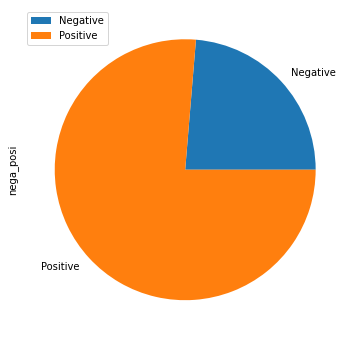

In [128]:
import pandas as pd 
df = pd.DataFrame({'nega_posi':[neg_sum, pos_sum]}, 
                  index=['Negative','Positive']) 
df.plot.pie(y='nega_posi', figsize=(6,6))